In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

## Linear Regression Single Variable

In [2]:
df_single_regression = pd.read_csv('./data/Term Insurance Single Variable Linear Regression.csv')

In [3]:
X = df_single_regression[['Age']]

In [4]:
y = df_single_regression[['Premium Insurance']]

In [5]:
X

,Age
0,25
1,30
2,35
3,40
4,45


In [6]:
y

,Premium Insurance
0,18000
1,32000
2,40000
3,47000
4,55000


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [8]:
X_train

,Age
0,25
1,30
3,40
4,45


In [9]:
X_test

,Age
2,35


In [10]:
y_train

,Premium Insurance
0,18000
1,32000
3,47000
4,55000


In [11]:
y_test

,Premium Insurance
2,40000


In [12]:
regression = linear_model.LinearRegression()

In [13]:
regression.fit(X_train, y_train);

In [14]:
regression.predict([[21]])

c:\Users\mbantwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13080.]])

In [15]:
regression.predict([[35]])

c:\Users\mbantwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[38000.]])

In [16]:
regression.predict(X_test)

array([[38000.]])

C:\Users\mbantwal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


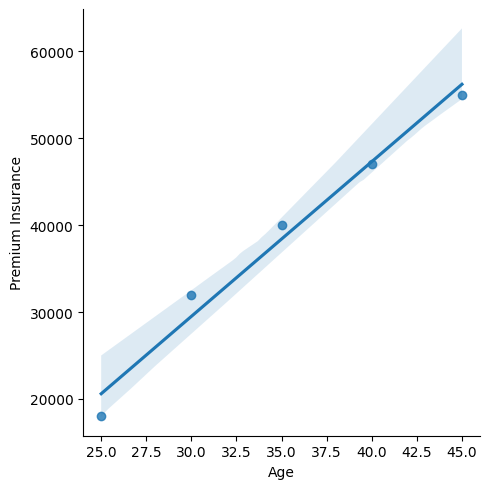

In [17]:
sns.lmplot(x='Age', y='Premium Insurance', data=df_single_regression);

In [18]:
regression.coef_

array([[1780.]])

In [19]:
regression.intercept_

array([-24300.])

## Linear Regression Multiple Variable

In [20]:
df_multiple_regression = pd.read_csv('./data/Term Insurance Multiple Variable Linear Regression.csv')

In [21]:
df_multiple_regression

,Age,Height,Weight,Premium Insurance
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,NaN,110,60000
4,45,157.48,85,70000


In [22]:
X = df_multiple_regression[['Age', 'Height', 'Weight']]

In [23]:
y = df_multiple_regression[['Premium Insurance']]

In [24]:
X

,Age,Height,Weight
0,25,162.56,70
1,30,172.72,95
2,35,167.64,78
3,40,NaN,110
4,45,157.48,85


In [25]:
y

,Premium Insurance
0,18000
1,38000
2,38000
3,60000
4,70000


In [26]:
df_multiple_regression['Height'] = df_multiple_regression['Height'].fillna(df_multiple_regression['Height'].mean())

In [27]:
X = df_multiple_regression[['Age', 'Height', 'Weight']]

In [28]:
X

,Age,Height,Weight
0,25,162.56,70
1,30,172.72,95
2,35,167.64,78
3,40,165.10,110
4,45,157.48,85


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [30]:
X_train

,Age,Height,Weight
0,25,162.56,70
1,30,172.72,95
3,40,165.10,110
4,45,157.48,85


In [31]:
X_test

,Age,Height,Weight
2,35,167.64,78


In [32]:
y_train

,Premium Insurance
0,18000
1,38000
3,60000
4,70000


In [33]:
y_test

,Premium Insurance
2,38000


In [34]:
regression = linear_model.LinearRegression()

In [35]:
regression.fit(X_train, y_train);

In [36]:
regression.predict([[27, 167.56, 60]])

c:\Users\mbantwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[27713.69562411]])

In [37]:
regression.predict(X_test)

array([[49383.60655738]])

In [38]:
regression.coef_

array([[2819.67213115,  709.95223958,  -52.45901639]])

In [39]:
regression.intercept_

array([-164229.50819672])

## Polynomial Regression

In [40]:
df_polynomial_regression = pd.read_csv('data/Position Salaries Polynomial Regression.csv')

In [41]:
df_polynomial_regression

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-Level,9,500000
9,CEO,10,1000000


In [42]:
X = df_polynomial_regression.iloc[:, 1:2].values

In [43]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [44]:
y = df_polynomial_regression.iloc[:,2].values

In [45]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

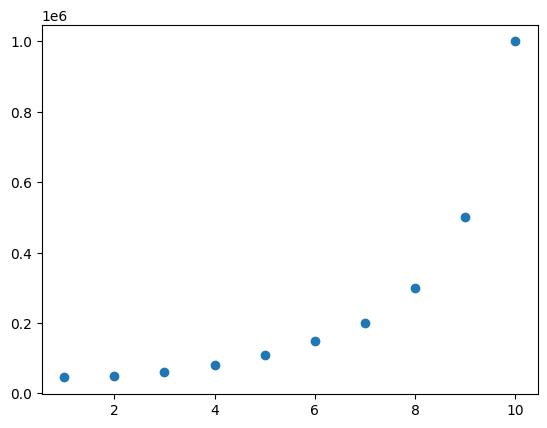

In [47]:
plt.scatter(X, y)

C:\Users\mbantwal\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


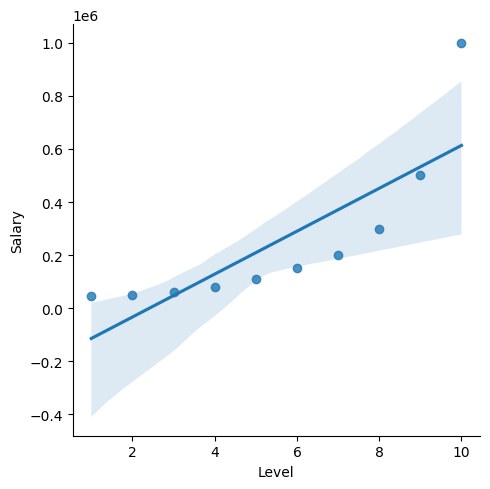

In [48]:
sns.lmplot(x="Level", y="Salary", data=df_polynomial_regression)

In [49]:
regression = linear_model.LinearRegression()

In [50]:
regression.fit(X_train, y_train);

In [51]:
regression.predict([[6.5]])
# Doesn't Make Sense!

array([331012.93103448])

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly = PolynomialFeatures(degree=2)

In [54]:
x_poly_train = poly.fit_transform(X)
x_poly_test = poly.transform(X_test)

In [55]:
regression_2 = linear_model.LinearRegression()

In [56]:
regression_2.fit(x_poly_train, y);

In [57]:
regression_2.predict(poly.fit_transform([[6.5]]))

array([189498.10606061])

In [58]:
regression_2.predict(poly.fit_transform(X_test))

array([610303.03030303,  44151.51515152])